<a href="https://colab.research.google.com/github/HONEYANASHATH/ml/blob/main/importCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
IMAGE_SIZE= (256,256)
BATCH_SIZE= 32
CHANNELS= 3
EPOCHES= 100

In [ ]:
dataset= tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data",
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Found 1386 files belonging to 4 classes.


In [ ]:
import os
import glob as gb
path= "/content/drive/MyDrive/data"
size=[]
for folder in os.listdir(path):
  files= gb.glob(pathname=str(path+"//"+folder+"/*.jpg"))
  for file in files:
    image=plt.imread(file)
    size.append(image.shape)
    pd.Series(size).value_counts()

In [ ]:
class_names=dataset.class_names
class_names

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [ ]:
len (dataset)

44

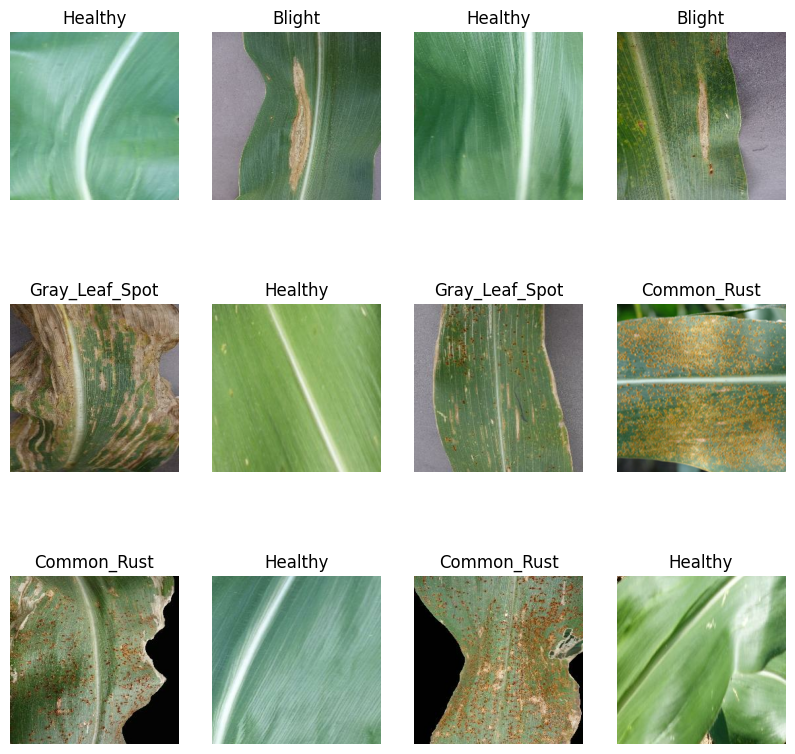

In [ ]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [ ]:
def get_dataset(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=8)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset(dataset)

In [ ]:
print("Length of Training Dataset is",len(train_ds))
print("\nLength of Validation Dataset is",len(val_ds))
print("\nLength of Testing Dataset is",len(test_ds))

Length of Training Dataset is 35

Length of Validation Dataset is 4

Length of Testing Dataset is 5


In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
layers.experimental.preprocessing.Resizing(256,256),
layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.3),
])

In [ ]:
n_classes = 4
input_shape = (BATCH_SIZE,256,256,3)
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation ='relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size = (3,3),activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy']
)

In [ ]:
history = model.fit(
train_ds,
epochs=15,
batch_size=BATCH_SIZE,
verbose=1,
validation_data=val_ds)

Epoch 1/15
35/35 [==============================] - 189s 5s/step - loss: 1.0809 - accuracy: 0.5874 - val_loss: 0.6525 - val_accuracy: 0.7422
Epoch 2/15
35/35 [==============================] - 167s 5s/step - loss: 0.5293 - accuracy: 0.7659 - val_loss: 0.4481 - val_accuracy: 0.8438
Epoch 3/15
35/35 [==============================] - 166s 5s/step - loss: 0.4384 - accuracy: 0.8015 - val_loss: 0.4328 - val_accuracy: 0.8203
Epoch 4/15
35/35 [==============================] - 172s 5s/step - loss: 0.4459 - accuracy: 0.8060 - val_loss: 0.3887 - val_accuracy: 0.8828
Epoch 5/15
35/35 [==============================] - 166s 5s/step - loss: 0.4437 - accuracy: 0.8151 - val_loss: 0.3778 - val_accuracy: 0.8125
Epoch 6/15
35/35 [==============================] - 165s 5s/step - loss: 0.5360 - accuracy: 0.7923 - val_loss: 0.3721 - val_accuracy: 0.8359
Epoch 7/15
35/35 [==============================] - 165s 5s/step - loss: 0.4178 - accuracy: 0.8297 - val_loss: 0.3023 - val_accuracy: 0.8828
Epoch 8/15
35

In [ ]:
loss,accuracy = model.evaluate(test_ds)
print(loss)
print(accuracy)

5/5 [==============================] - 11s 1s/step - loss: 0.2992 - accuracy: 0.8687
0.29916277527809143
0.8687499761581421


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 35}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
pip install pd

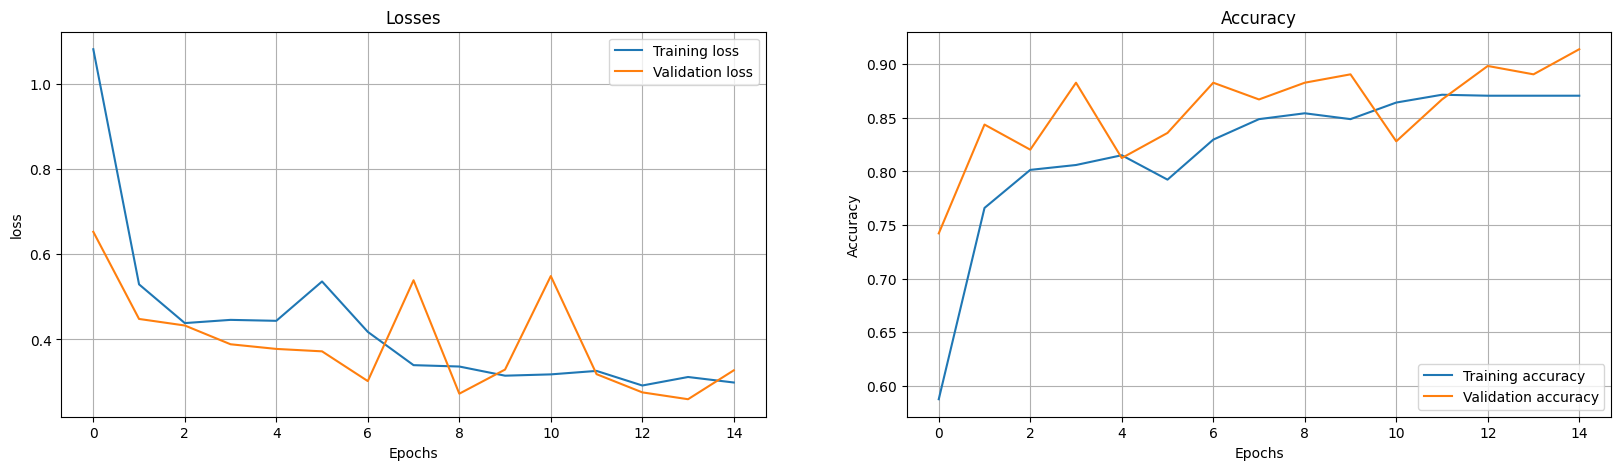

In [ ]:
his_data = pd.DataFrame(history.history)
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(his_data.loss, label="Training loss")
plt.plot(his_data.val_loss, label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Losses")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(his_data.accuracy, label="Training accuracy")
plt.plot(his_data.val_accuracy, label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.grid()
plt.legend()

First Image to Predict :

Actual label: Healthy
1/1 [==============================] - 1s 1s/step

Predicted label Healthy


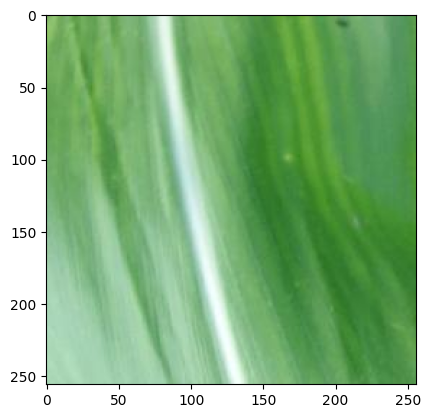

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First Image to Predict :")
    plt.imshow(first_image)
    print("\nActual label:",class_names[first_label])
    batch_prediction = model. predict (images_batch)
    print("\nPredicted label" ,class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict (img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
#     confidence = round(np.max(predictions[0]),2)
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 [==============================] - 0s 64ms/step


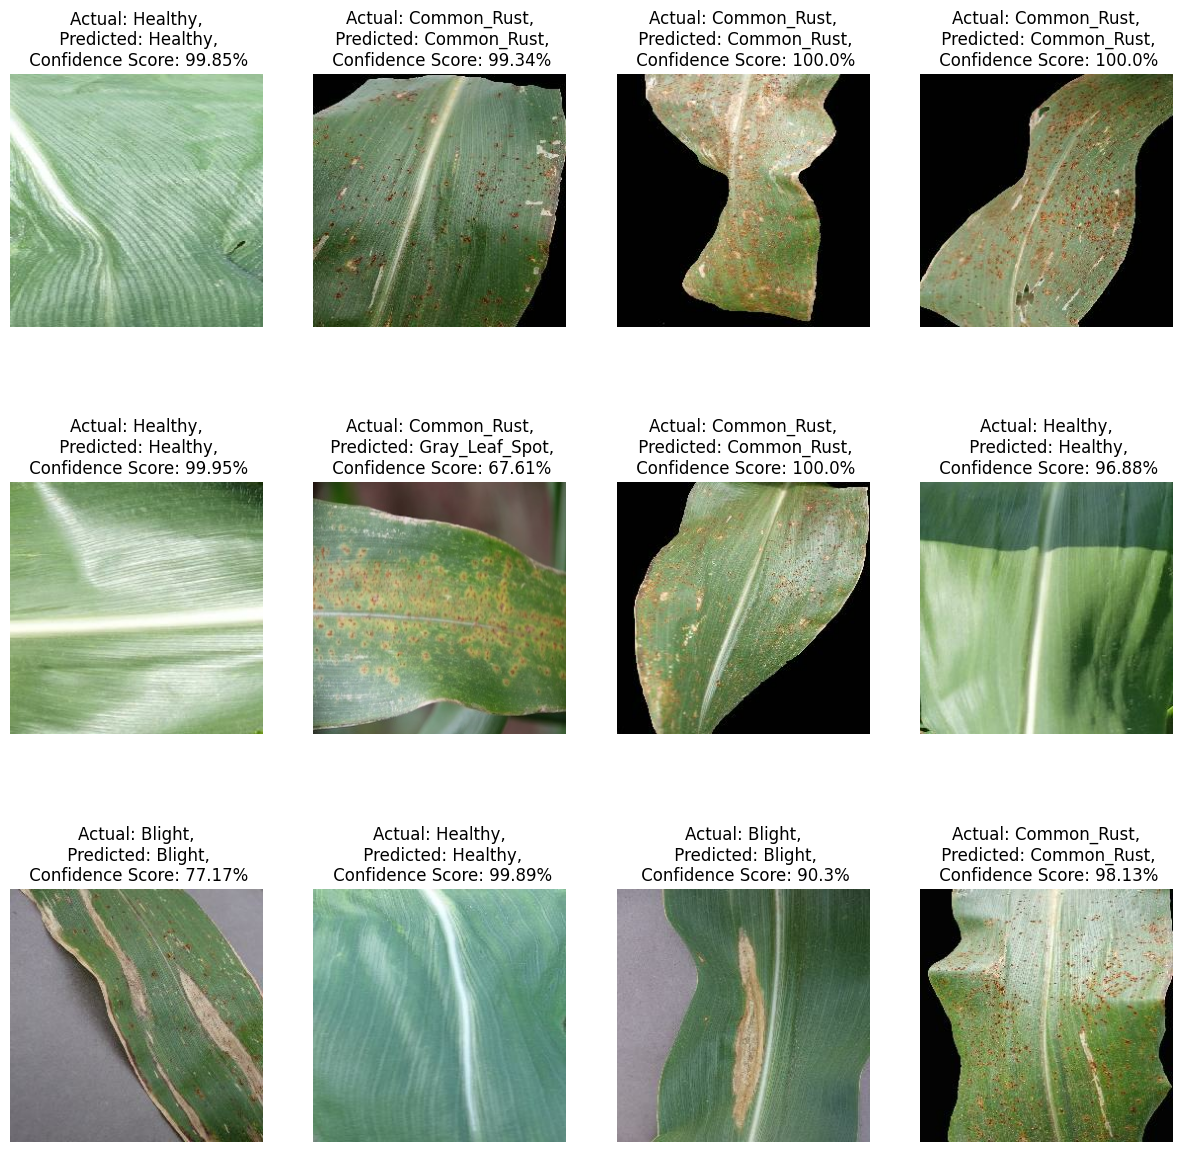

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class , confidence = predict(model,images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence Score: {confidence}%")
        plt.axis("off")

In [ ]:
model.save('/kaggle/working/model_accuracy98%')

In [1]:
from google.colab import drive


In [2]:
from google.colab import drive
drive.mount('/content/drive/')


from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_file_path = '/content/drive/MyDrive/data'
train_file_path =  '/content/drive/MyDrive/data'
val_file_path =  '/content/drive/MyDrive/data'

valid_split = 0.2
input_size = (244, 244)
image_color = 'rgb'
batch_size = 32
shuffle=True
train_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split,fill_mode='nearest',rotation_range=40,horizontal_flip=True)

validation_gen=ImageDataGenerator(rescale=1/255.0,validation_split=valid_split)

test_gen=ImageDataGenerator(rescale=1/255.0)

train_data=train_gen.flow_from_directory(directory=train_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
test_data=test_gen.flow_from_directory(directory=test_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')
valid_data=validation_gen.flow_from_directory(directory=val_file_path,target_size=input_size,color_mode=image_color,
                                             batch_size=batch_size,shuffle=shuffle,class_mode='categorical')

Mounted at /content/drive/
Found 1386 images belonging to 4 classes.
Found 1386 images belonging to 4 classes.
Found 1386 images belonging to 4 classes.


In [3]:
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
import numpy as np

In [4]:
# Define input shape and number of classes
input_shape = (244, 244, 3)
num_classes = 4

# Create the base pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a final softmax layer for classification
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the base model and the top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

29084464/29084464 [==============================] - 0s 0us/step


In [5]:
# Compile the model with Adam optimizer and categorical cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_data, epochs=20, validation_data=valid_data)

Epoch 1/20
11/44 [======>.......................] - ETA: 5:29 - loss: 0.8291 - accuracy: 0.6420